## **Homework 2**

### **Pandas**

In [2]:
# Импортируем необходимые для анализа библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Прочитаем файл в переменную
file = r"c:\Users\admin\Desktop\kc_house_data.csv"
# присвоим его переменной "df". или любой другой понятной переменной  с помощью метода для чтения csv, 
df = pd.read_csv(file)

# Описание признаков датасета

| Переменная    | Описание                                                                                                                 |
| ------------- | ------------------------------------------------------------------------------------------------------------------------ |
| id            | Нотация для дома                                                                                                         |
| date          | дата когда было продано                                                                                                  |
| price         | Цена - это цель прогноза                                                                                                 |
| bedrooms      | Количество спален                                                                                                        |
| bathrooms     | Количество ванных комнат                                                                                                 |
| sqft_living   | Квадратные метры дома                                                                                                    |
| sqft_lot      | Квадратные метры лота                                                                                                    |
| floors        | Общие этажи (уровни) в доме                                                                                              |
| waterfront    | Дом, который имеет вид на набережную                                                                                     |
| view          | Вид из окна                                                                                                              |
| condition     | Насколько хорошим состояние в целом                                                                                      |
| grade         | Общая оценка, предоставленная Индекс от 1 до 13, где 1-3 - недостаточный уровень строительства и дизайна здания,         |
|               | 7 - средний уровень строительства и дизайна, а 11-13 - высококачественный уровень строительства и дизайна                |
| sqft_above    | Квадратные метры дома, кроме подвала                                                                                     |
| sqft_basement | Квадратные метры подвала                                                                                                 |
| yr_built      | Год постройки                                                                                                            |
| yr_renovated  | Год, когда дом был отремонтирован                                                                                        |
| zipcode       | Zip code                                                                                                                 |
| lat           | Широта координата                                                                                                        |
| long          | Координата долготы                                                                                                       |
| sqft_living15 | Гостиная зона                                                                                                            |
| sqft_lot15    | Район лот размещения в 2015 году (подразумевает- некоторые ремонтные работы)                                             |


Проверим, верно ли загрузился датасет

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Посмотрим типы данных, количество строк, столбцов, заполенны ли ячейки

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Пустых ячеек нет, большинство данных имеют цифровой тип и поддаются анализу, **однако, формат в некоторых столбцах не логичен**, так как не может быть полторы ванной комнаты, ну или полтора этажа (наверное)

In [6]:
#Можно убедиться, просто посчитав корличество пустых ячеек, если таковые имеются
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Изменим типы данных

In [7]:
# Заменим поплавок на инт (команда эс тайп не перезаписывает исходный столбец, поэтому нужно приравнивать к исходным данным)
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [8]:
# Проверим результат
df['bathrooms'].dtypes, df['floors'].dtypes

(dtype('int32'), dtype('int32'))

Посмотрим статистическое описание датасета

In [9]:
# выводим статистические характеристики с фиксированной точностью
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,1.75,2079.90,15106.97,1.45,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.73,918.44,41420.51,0.55,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.00,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.00,1910.00,7618.00,1.00,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.00,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.00,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [10]:
# или так
print(df.describe(include='all'))

                  id             date      price  bedrooms  bathrooms  \
count       21613.00            21613   21613.00  21613.00   21613.00   
unique           NaN              372        NaN       NaN        NaN   
top              NaN  20140623T000000        NaN       NaN        NaN   
freq             NaN              142        NaN       NaN        NaN   
mean   4580301520.86              NaN  540088.14      3.37       1.75   
std    2876565571.31              NaN  367127.20      0.93       0.73   
min       1000102.00              NaN   75000.00      0.00       0.00   
25%    2123049194.00              NaN  321950.00      3.00       1.00   
50%    3904930410.00              NaN  450000.00      3.00       2.00   
75%    7308900445.00              NaN  645000.00      4.00       2.00   
max    9900000190.00              NaN 7700000.00     33.00       8.00   

        sqft_living   sqft_lot   floors  waterfront     view  ...    grade  \
count      21613.00   21613.00 21613.00    21

In [11]:
# еще раз ознакомимся с форматом данных в нашей таблице для их стандартизации, нормализации и тп
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639


Исправим формат даты

In [12]:
# положим в датафрейм столбца дата новый формат этой самой даты с помощью конвертации его в более понятный формат 
# с помощью to_datetame() столбец.
df['date'] = pd.to_datetime(df.date)
# print (df)
df[['date']].head()

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18


Нули в колонках фактически имеют смысл - что данных нет, либо что то отсутствует, например дом не ремонтировался. при некоторых вариантах анализа это сильно исказит данные. исправим, заменяя их на nan

In [31]:
import numpy as np
df = df.replace(0, np.NaN)

In [32]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,7,1180,NaN,1955,NaN,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3.00,2.00,2570,7242,2,NaN,NaN,...,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2.00,1.00,770,10000,1,NaN,NaN,...,6,770,NaN,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960,5000,1,NaN,NaN,...,7,1050,910.00,1965,NaN,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680,8080,1,NaN,NaN,...,8,1680,NaN,1987,NaN,98074,47.62,-122.05,1800,7503


**Ответьте на несколько вопросов**

3.1 В каком диапазоне изменяются стоимости недвижимости?


для этого  мы можем посмотреть статистическое описание столбца и оценить параметры от мин до макс, в том числе, можно визуализировать эти данные

In [13]:
df['price'].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

Обычно для визуализации таких данных использую барплоты, но выглядит сейчас это отвратительно, так как сильныйй раздрос цен между квартилями  и мин и макс

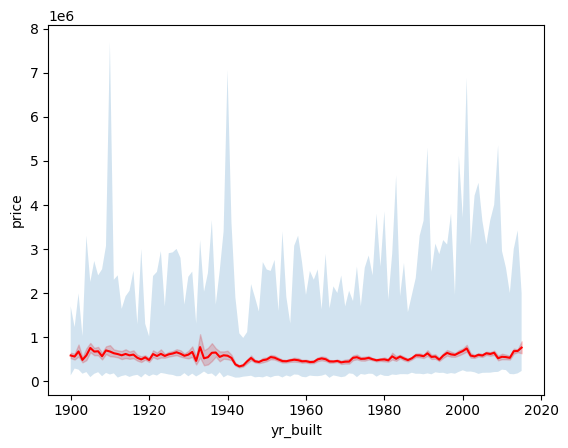

In [14]:
# Группировка данных по году постройки и вычисление минимального и максимального значения цены в каждой группе
price_range = df.groupby('yr_built')['price'].agg(['min', 'max'])

# Создание линейного графика
sns.lineplot(data=df, x="yr_built", y="price", color="r")

# Отображение диапазона на графике
plt.fill_between(price_range.index, price_range['min'], price_range['max'], alpha=0.2)

# Отображение графика
plt.show()

3.2 Какую долю в среднем занимают жилая площадь от всей площади по всем домам?


Для решения этой задачи, общую площадь разделим на жилую и найдем среднбюю, отформатируем в процентах. так же, визуализируем

In [15]:
living_area_ratio = (df['sqft_living'] / df['sqft_lot']).mean()

# Вывод результата
print("Средняя доля жилой площади от общей площади по всем домам: {:.2%}".format(living_area_ratio))

Средняя доля жилой площади от общей площади по всем домам: 32.37%


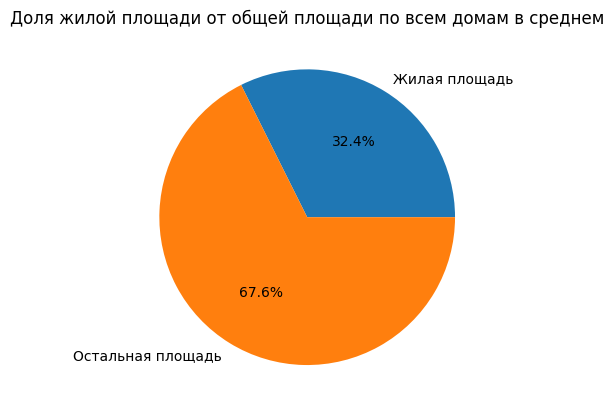

In [16]:
#  Вычисление доли оставшейся площади
other_area_ratio = 1 - living_area_ratio

# Создание списка долей для круговой диаграммы
ratios = [living_area_ratio, other_area_ratio]

# Создание списка меток для круговой диаграммы
labels = ['Жилая площадь', 'Остальная площадь']

# Создание круговой диаграммы
plt.pie(ratios, labels=labels, autopct='%1.1f%%')

# Добавление заголовка
plt.title('Доля жилой площади от общей площади по всем домам в среднем')

# Отображение диаграммы
plt.show()
#

3.3 Как много домов с разными этажами в данных?


In [17]:
# Для решения этой задачи, нам необходимо группировать данные по этажам и посчитать сколько таких домов с помощью value count
count_floors = df['floors'].value_counts()

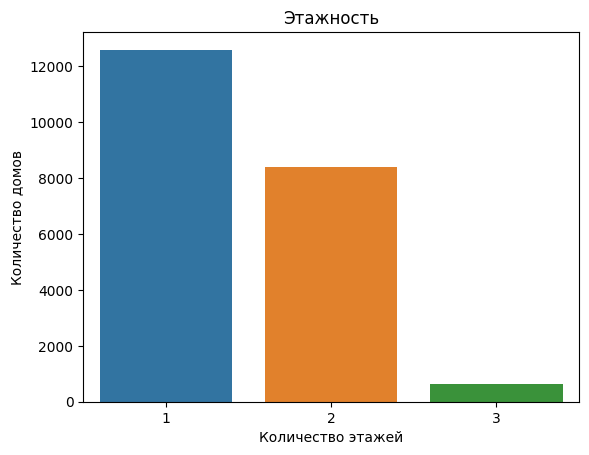

In [18]:
sns.barplot(x=count_floors.index, y=count_floors.values)
# добавляем подписи осей
plt.title("Этажность")
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.show()

Как мы видим, в выборке в основном одноэтажные и двухэтажные дома

3.4 Насколько хорошие состояния у домов в данных?

Для этого обратимся к столбцу condition, и просмотрим, какие вообще существуют состояния домов

In [19]:
count_condition = df['condition'].value_counts()

Итак, у нас есть 5 оценок состояний домов, возможно 1 - это плохой дом, 5 это отличное состояние жилого дома. Вопрос насколько хорошо это или плохо, буду воспринимать следующим образом:
насколько много домов выше 3, ибо это самое с=частое состояние домов

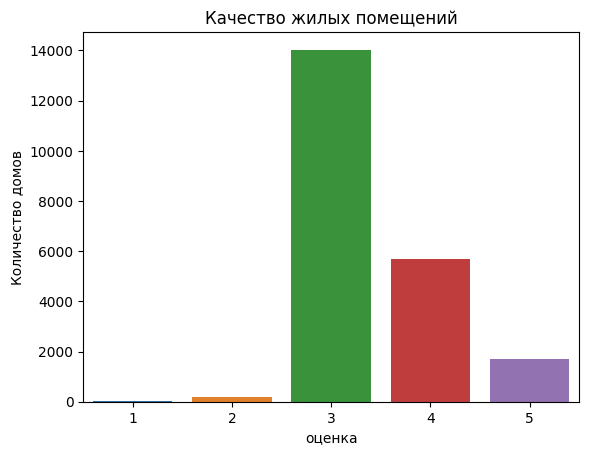

In [20]:
sns.barplot(x=count_condition.index, y=count_condition.values)

# добавляем подписи осей
plt.title("Качество жилых помещений")
plt.xlabel('оценка')
plt.ylabel('Количество домов')
plt.show()

Судя по всему домов в хорошем состоянии не так много, в целом, качество близится к среднему. интересно, как это связано с их ремонтом возможно их не чинили

In [39]:
# Итак, отфильтруем датасет так чтобы были только отремонтированные дома 
reinovated_df = df.loc[df['yr_renovated'].notnull()]
reinovated_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014-12-09,538000.00,3.00,2.00,2570,7242,2,NaN,NaN,...,7,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
35,9547205180,2014-06-13,696000.00,3.00,2.00,2300,3060,1,NaN,NaN,...,8,1510,790.00,1930,2002.00,98115,47.68,-122.31,1590,3264
95,1483300570,2014-09-08,905000.00,4.00,2.00,3300,10250,1,NaN,NaN,...,7,2390,910.00,1946,1991.00,98040,47.59,-122.25,1950,6045
103,2450000295,2014-10-07,1088000.00,3.00,2.00,2920,8113,2,NaN,NaN,...,8,2920,NaN,1950,2010.00,98004,47.58,-122.20,2370,8113
115,3626039325,2014-11-21,740500.00,3.00,3.00,4380,6350,2,NaN,NaN,...,8,2780,1600.00,1900,1999.00,98117,47.70,-122.37,1830,6350


In [40]:
df_not_reinovated = df.loc[df['yr_renovated'].isnull()]
df_not_reinovated.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180,5650,1,NaN,NaN,...,7,1180,NaN,1955,NaN,98178,47.51,-122.26,1340,5650
2,5631500400,2015-02-25,180000.00,2.00,1.00,770,10000,1,NaN,NaN,...,6,770,NaN,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960,5000,1,NaN,NaN,...,7,1050,910.00,1965,NaN,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680,8080,1,NaN,NaN,...,8,1680,NaN,1987,NaN,98074,47.62,-122.05,1800,7503
5,7237550310,2014-05-12,1225000.00,4.00,4.00,5420,101930,1,NaN,NaN,...,11,3890,1530.00,2001,NaN,98053,47.66,-122.00,4760,101930


In [41]:
# Посмотрим теперь как дело обстоит с оценками их качества
count_condition_reinnovated = reinovated_df['condition'].value_counts()
count_condition_reinnovated

3    736
4    136
5     37
2      4
1      1
Name: condition, dtype: int64

In [42]:
# Посмотрим теперь как дело обстоит с оценками их качества
count_condition_not_reinnovated = df_not_reinovated['condition'].value_counts()
count_condition_not_reinnovated

3    13295
4     5543
5     1664
2      168
1       29
Name: condition, dtype: int64

Домов без реновации и с оценками 4 и 5: 7207
Домов после реновации и с оценками 4 и 5: 173


C:\Users\admin\AppData\Local\Temp/ipykernel_7860/2067696214.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reinovated = reinovated_df[df['condition'].isin([4, 5])]
C:\Users\admin\AppData\Local\Temp/ipykernel_7860/2067696214.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_reinovated = df_not_reinovated[df['condition'].isin([4, 5])]


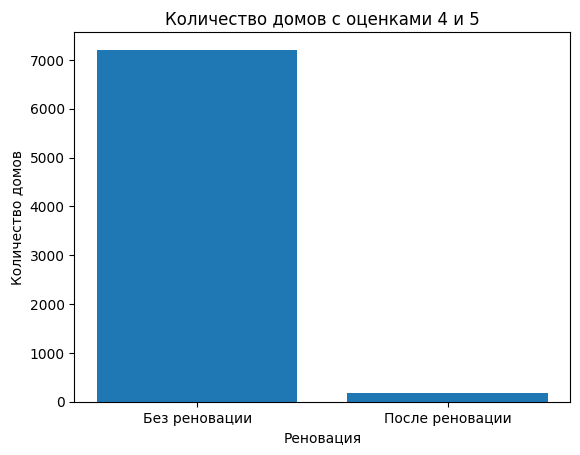

In [45]:
# Фильтруем дома, которые были реновированы и имеют оценки 4 и 5
reinovated = reinovated_df[df['condition'].isin([4, 5])]
no_reinovated = df_not_reinovated[df['condition'].isin([4, 5])]
# Считаем количество домов в каждой категории
no_renovation_count = len(no_reinovated)
renovated_count = len(reinovated)

# Выводим результаты
print(f'Домов без реновации и с оценками 4 и 5: {no_renovation_count}')
print(f'Домов после реновации и с оценками 4 и 5: {renovated_count}')

# Строим столбчатую диаграмму
plt.bar(['Без реновации', 'После реновации'], [no_renovation_count, renovated_count])
plt.title('Количество домов с оценками 4 и 5')
plt.xlabel('Реновация')
plt.ylabel('Количество домов')
plt.show()

#### Сравним данные в процентном соотношении

In [66]:
total_count_not_reinovated = len(df_not_reinovated)
# Считаем процентное соотношение
no_renovation_percent = no_renovation_count / total_count_not_reinovated
print(total_count_not_reinovated)
print("Доля домов с оценками 4 и 5 в общем количестве домов без реинновации: {:.2%}".format(no_renovation_percent))

20699
Доля домов с оценками 4 и 5 в общем количестве домов без реинновации: 34.82%


In [52]:
total_count_reinnov = len(reinovated_df)
# Считаем процентное соотношение
renovation_percent = renovated_count / total_count_reinnov
print(total_count_reinnov)
print("Доля домов с оценками 4 и 5 в общем количестве домов после реинновации: {:.2%}".format(renovation_percent))

914
Доля домов с оценками 4 и 5 в общем количестве домов после реинновации: 18.93%


In [62]:
count_houses = len(df)
count_houses

21613

Странная история, видимо реинновация не идет на пользу недвижимости))

In [64]:
total_good_cond = sum(df['condition'].isin([4, 5]))
total_good_cond

7380

In [69]:
med_condition = sum(df['condition']== 3)
med_condition

14031

In [65]:
good_condition = total_good_cond/count_houses
print("Доля домов с оценками 4 и 5 в общем количестве домов: {:.2%}".format(good_condition))

Доля домов с оценками 4 и 5 в общем количестве домов: 34.15%


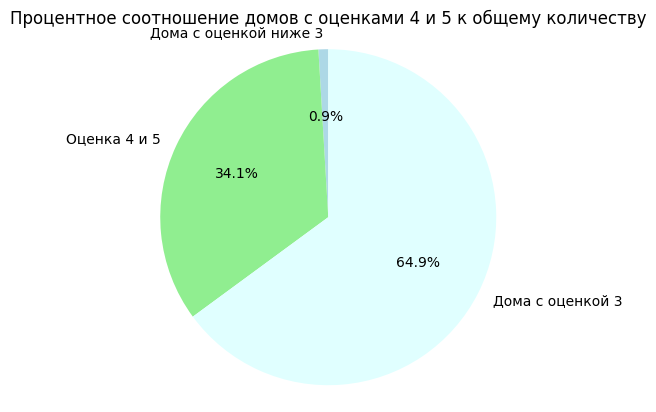

In [77]:
# Строим круговую диаграмму
labels = ['Дома с оценкой ниже 3', 'Оценка 4 и 5','Дома с оценкой 3']
sizes = [count_houses - (total_good_cond + med_condition), total_good_cond, med_condition ]
colors = ['lightblue', 'lightgreen', 'lightcyan']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Процентное соотношение домов с оценками 4 и 5 к общему количеству')
plt.show()

В целом, состояние домов в среднем имеет оценку 3, хороших домов только треть, к тому же, после реинновации, почему то оценки домов падают) 

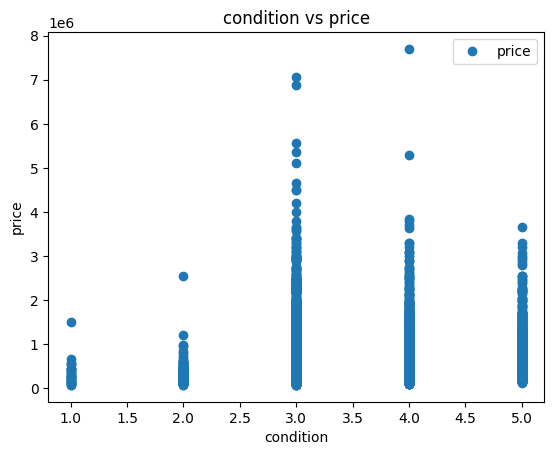

,condition,price
condition,1.00,0.04
price,0.04,1.00


In [102]:
df.plot(x='condition', y='price', style='o')
plt.title('condition vs price')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()
df[['condition','price']].corr()

3.5 Найдите год, когда построили первый дом, когда построили последний дом в данных?

In [89]:
sorted_data = df.sort_values('yr_built', ascending = False)
sorted_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21369,923059259,2015-04-01,455950.00,4.00,2.00,2720,5771,2,NaN,NaN,...,8,2720,NaN,2015,NaN,98056,47.49,-122.17,1940,4184
1763,1832100030,2014-06-25,597326.00,4.00,4.00,3570,8250,2,NaN,NaN,...,10,2860,710.00,2015,NaN,98040,47.58,-122.23,2230,10000
21262,5694500840,2014-11-25,559000.00,2.00,3.00,1650,960,3,NaN,NaN,...,8,1350,300.00,2015,NaN,98103,47.66,-122.35,1650,3000


In [93]:
sorted_data = df.sort_values('yr_built', ascending = True)
sorted_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4697,9126101645,2014-06-10,558000.00,4.00,2.00,2180,3870,1,NaN,NaN,...,7,1020,1160.00,1900,NaN,98122,47.61,-122.30,1520,2580
2961,1947300115,2014-06-19,464000.00,3.00,1.00,1320,3625,2,NaN,NaN,...,7,1320,NaN,1900,NaN,98122,47.60,-122.29,1660,5438
12369,9138100350,2015-02-18,685000.00,4.00,2.00,2290,6000,1,NaN,3.00,...,7,2290,NaN,1900,NaN,98115,47.68,-122.32,2000,3150


In [103]:
df.corr()

C:\Users\admin\AppData\Local\Temp/ipykernel_7860/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,-0.00,-0.01,-0.13,0.02,NaN,0.01,-0.02,0.01,-0.01,-0.02,0.02,0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.51,0.70,0.09,0.24,NaN,0.30,0.04,0.67,0.61,0.41,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.46,0.58,0.03,0.16,NaN,0.04,0.03,0.36,0.48,0.43,0.16,0.16,-0.15,-0.01,0.13,0.39,0.03
bathrooms,-0.00,0.51,0.46,1.00,0.70,0.09,0.49,NaN,0.15,-0.13,0.60,0.64,0.36,0.43,0.22,-0.16,0.03,0.18,0.51,0.08
sqft_living,-0.01,0.70,0.58,0.70,1.00,0.17,0.35,NaN,0.21,-0.06,0.76,0.88,0.72,0.32,0.14,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,NaN,0.06,-0.01,0.11,0.18,0.16,0.05,-0.07,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.24,0.16,0.49,0.35,-0.01,1.00,NaN,0.10,-0.29,0.47,0.52,-0.10,0.58,0.05,-0.10,0.03,0.16,0.30,-0.01
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.01,0.30,0.04,0.15,0.21,0.06,0.10,NaN,1.00,0.02,0.22,0.18,0.21,0.04,-0.09,0.00,-0.03,0.03,0.20,0.07
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.29,NaN,0.02,1.00,-0.14,-0.16,0.16,-0.36,-0.37,0.00,-0.01,-0.11,-0.09,-0.00


In [108]:
# посмотрим от чего же в наибольшей степени зависит цена
corr_matrix = df.corr()
price_corr = corr_matrix['price'].sort_values(ascending=False).head(6)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_7860/3715882859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price           1.00
sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.51
Name: price, dtype: float64

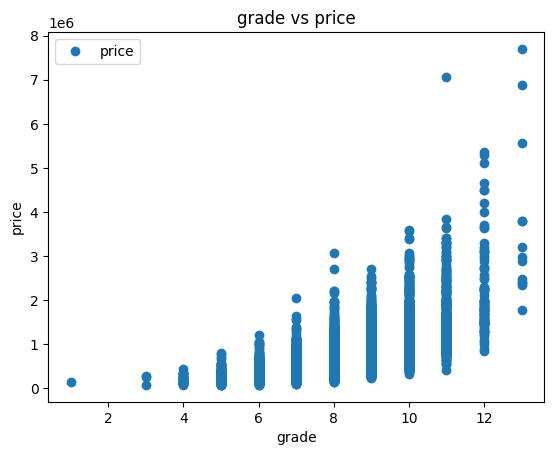

,grade,price
grade,1.00,0.67
price,0.67,1.00


In [109]:
df.plot(x='grade', y='price', style='o')
plt.title('grade vs price')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()
df[['grade','price']].corr()

**Условие 4: 4 задача**
4.1 Сколько в среднем стоят дома, у которых 2 спальни?


In [124]:
two_bedrooms = df.loc[df['bedrooms'] == 2]
mean_price = two_bedrooms['price'].mean()
mean_price

401372.681884058

In [123]:
mean_price_1 = df.query('bedrooms == 2')['price'].mean()
mean_price_1


401372.681884058

4.2 Какая в среднем общая площадь домов, у которых стоимость больше 600 000?


In [132]:
mean_sqft = round(df.query('price < 600000')['sqft_above'].mean())

mean_sqft

1518

In [134]:
high_price = df.loc[df['price'] < 600000]
mean_sqft_1 = round(high_price['sqft_above'].mean())
mean_sqft_1

1518

4.3 Как много домов коснулся ремонт?


In [138]:
# Итак, отфильтруем датасет так чтобы были только отремонтированные дома 
reinovated_df = df.loc[df['yr_renovated'].notnull()]
print(len(reinovated_df))

914


4.4 Насколько в среднем стоимость домов с оценкой grade домов выше 10 отличается от стоимости домов с оценкой grade меньше 4?


In [152]:
high_grade = df.loc[df['grade'] > 10]
high_grade.sort_values('grade',ascending=False).head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1225000.00,4.00,4.00,5420,101930,1,NaN,NaN,...,11,3890,1530.00,2001,NaN,98053,47.66,-122.00,4760,101930
14840,2424059018,2014-06-12,1070000.00,4.00,2.00,3270,35445,2,NaN,NaN,...,11,3270,NaN,1989,NaN,98006,47.55,-122.12,4180,32130
14821,7525950180,2014-07-01,1060000.00,4.00,2.00,4570,16015,2,NaN,2.00,...,11,4570,NaN,1990,NaN,98074,47.62,-122.07,4490,17668
14774,9412400220,2014-07-10,1612500.00,4.00,2.00,5470,18200,2,1.00,4.00,...,11,3730,1740.00,1992,NaN,98118,47.53,-122.26,3620,15100
14669,4139430910,2014-10-21,935000.00,4.00,3.00,4110,15488,2,NaN,2.00,...,11,4110,NaN,1995,NaN,98006,47.55,-122.12,4190,14973


In [159]:
mean_price_high = high_grade['price'].mean().round()
mean_price_high

1678635.0

In [151]:
low_grade = df.loc[df['grade'] < 4]
low_grade.sort_values('grade',ascending=True).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,2014-09-26,142000.00,NaN,NaN,290,20875,1,NaN,NaN,...,1,290,NaN,1963,NaN,98024,47.53,-121.89,1620,22850
1149,3421079032,2015-02-17,75000.00,1.00,NaN,670,43377,1,NaN,NaN,...,3,670,NaN,1966,NaN,98022,47.26,-121.91,1160,42882
3223,2420069251,2015-02-25,262000.00,1.00,NaN,520,12981,1,NaN,NaN,...,3,520,NaN,1920,NaN,98022,47.21,-122.00,1340,12233
5832,5702500050,2014-11-04,280000.00,1.00,NaN,600,24501,1,NaN,NaN,...,3,600,NaN,1950,NaN,98045,47.53,-121.75,990,22549


In [158]:
mean_price_low = low_grade['price'].mean().round()
mean_price_low

189750.0

In [157]:
# вычисление разницы между средними значениями
diff = mean_price_high - mean_price_low

print('Средняя стоимость домов high_grade выше на', diff)

Средняя стоимость домов high_grade выше на 1488885.0


<Axes: xlabel='grade', ylabel='price'>

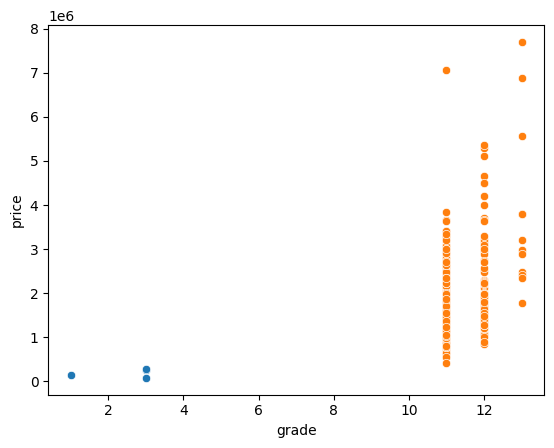

In [196]:


sns.scatterplot(data = low_grade, x = "grade", y = "price")
sns.scatterplot(data = high_grade, x = "grade", y = "price")

## Условие 5: 5 задача


In [166]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21600.00,21527.00,21613.00,21613.00,21613.00,163.00,2124.00,21613.00,21613.00,21613.00,8487.00,21613.00,914.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,1.76,2079.90,15106.97,1.45,1.00,2.38,3.41,7.66,1788.39,742.36,1971.01,1995.83,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.73,918.44,41420.51,0.55,0.00,0.92,0.65,1.18,828.09,405.11,29.37,15.52,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,1.00,1.00,290.00,520.00,1.00,1.00,1.00,1.00,1.00,290.00,10.00,1900.00,1934.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.00,1427.00,5040.00,1.00,1.00,2.00,3.00,7.00,1190.00,450.00,1951.00,1987.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.00,1910.00,7618.00,1.00,1.00,2.00,3.00,7.00,1560.00,700.00,1975.00,2000.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.00,2550.00,10688.00,2.00,1.00,3.00,4.00,8.00,2210.00,980.00,1997.00,2007.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.00,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


5.1 Выберите дом клиенту
Клиент хочет дом с видом на набережную, как минимум с тремя ванными и с подвалом. Сколько вариантов есть у клиента?


In [162]:
house1 = df[
    (df['waterfront'].notnull()) &
    (df['bathrooms'] >= 3) &
    (df['sqft_basement'].notnull())
]
house1.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
300,3225069065,2014-06-24,3075000.00,4.00,5.00,4550,18641,1,1.00,4.00,...,10,2600,1950.00,2002,NaN,98074,47.61,-122.08,4550,19508
457,2122039094,2014-11-26,705000.00,3.00,3.00,1970,20978,2,1.00,3.00,...,9,1770,200.00,1980,NaN,98070,47.38,-122.44,2280,75396
1164,1247600105,2014-10-20,5110800.00,5.00,5.00,8010,45517,2,1.00,4.00,...,12,5990,2020.00,1999,NaN,98033,47.68,-122.21,3430,26788
1261,7636800041,2014-06-25,995000.00,3.00,4.00,4380,47044,2,1.00,3.00,...,9,3720,660.00,1968,1990.00,98166,47.47,-122.36,2460,18512
1315,7558700030,2015-04-13,5300000.00,6.00,6.00,7390,24829,2,1.00,4.00,...,12,5000,2390.00,1991,NaN,98040,47.56,-122.21,4320,24619


In [191]:
print(len(house1))


41


5.2 Выберите дом клиенту
Клиент хочет дом либо с очень красивым видом из окна, либо с видом на набережную, в очень хорошем состоянии и год постройки не меньше 1980 года. В какой ценовом диапазоне будут дома?


In [189]:
# посмотрим что такое 'очень красиво'
very_beautiful = df['view'].max()
f'Очень красиво, вероятнее всего = {very_beautiful}'

'Очень красиво, вероятнее всего = 4.0'

In [175]:
house2 = df[
    (df['waterfront'].notnull())|
    (df['view'] == very_beautiful) &
    (df['condition'] < 4) &
    (df['yr_built'] > 1980) 
]
house2.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,2015-03-11,1350000.00,3.00,2.00,2753,65005,1,1.00,2.00,...,9,2165,588.00,1953,NaN,98070,47.40,-122.45,2680,72513
230,8096000060,2015-04-13,655000.00,2.00,1.00,1450,15798,2,1.00,4.00,...,7,1230,220.00,1915,1978.00,98166,47.45,-122.38,2030,13193
246,2025069065,2014-09-29,2400000.00,4.00,2.00,3650,8354,1,1.00,4.00,...,9,1830,1820.00,2000,NaN,98074,47.63,-122.07,3120,18841
264,2123039032,2014-10-27,369900.00,1.00,NaN,760,10079,1,1.00,4.00,...,5,760,NaN,1936,NaN,98070,47.47,-122.44,1230,14267
300,3225069065,2014-06-24,3075000.00,4.00,5.00,4550,18641,1,1.00,4.00,...,10,2600,1950.00,2002,NaN,98074,47.61,-122.08,4550,19508


In [176]:
house2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,215.00,215.00,215.00,209.00,215.00,215.00,215.00,163.00,215.00,215.00,215.00,215.00,136.00,215.00,42.00,215.00,215.00,215.00,215.00,215.00
mean,4712855515.07,1617017.61,3.47,2.51,3436.05,28210.49,1.64,1.00,3.82,3.40,9.13,2668.68,1213.12,1970.62,1988.57,98089.53,47.55,-122.26,2802.67,22387.55
std,2954961415.89,1140462.74,1.10,1.19,1806.69,52143.73,0.62,0.00,0.50,0.68,1.78,1398.73,725.86,28.81,12.44,59.38,0.12,0.15,889.42,26707.66
min,98001070.00,285000.00,1.00,1.00,440.00,1171.00,1.00,1.00,1.00,1.00,5.00,440.00,100.00,1903.00,1958.00,98001.00,47.25,-122.51,750.00,1505.00
25%,2122539063.00,772500.00,3.00,2.00,2165.00,10070.00,1.00,1.00,4.00,3.00,8.00,1730.00,800.00,1948.50,1984.25,98040.00,47.46,-122.38,2240.00,10257.50
50%,4055701200.00,1310000.00,3.00,2.00,3110.00,16387.00,2.00,1.00,4.00,3.00,9.00,2400.00,1075.00,1976.00,1990.00,98074.00,47.56,-122.26,2760.00,14810.00
75%,7631800062.50,2025000.00,4.00,3.00,4325.00,25472.00,2.00,1.00,4.00,4.00,10.00,3255.00,1570.00,1996.00,1997.75,98145.00,47.63,-122.19,3390.00,23503.00
max,9808700762.00,7062500.00,7.00,8.00,13540.00,505166.00,3.00,1.00,4.00,5.00,13.00,9410.00,4820.00,2014.00,2009.00,98199.00,47.77,-121.74,5380.00,217800.00


In [179]:
print(f"Ценовой диапазон на такую недвижимость от {house2['price'].min()} и до {house2['price'].max()}")

Ценовой диапазон на такую недвижимость от 285000.0 и до 7062500.0


5.3 Выберите дом клиенту
Клиент хочет дом без подвала, с двумя этажами, стоимостью до 150000. Какая оценка по состоянию у таких домов в среднем?

In [182]:
house3 = df[
    (df['price'] < 150000)&
    (df['floors'] == 2) &
    (df['sqft_basement'].isnull())
]
house3.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2589,5061300030,2014-05-08,134000.00,2.00,1.00,980,5000,2,NaN,NaN,...,7,980,NaN,1922,2003.00,98014,47.71,-121.36,1040,5000
10105,5466310060,2015-03-24,139500.00,2.00,1.00,1230,1561,2,NaN,NaN,...,7,1230,NaN,1983,NaN,98042,47.38,-122.15,1660,2243
15610,7614100080,2015-02-11,140000.00,3.00,1.00,1270,8991,2,NaN,NaN,...,7,1270,NaN,1981,NaN,98042,47.36,-122.15,1270,8993
18332,9272202260,2014-09-24,130000.00,3.00,1.00,1200,7000,2,NaN,NaN,...,7,1200,NaN,1908,NaN,98116,47.59,-122.38,3290,6000
18939,4239400300,2014-11-29,90000.00,3.00,1.00,980,2490,2,NaN,NaN,...,6,980,NaN,1969,NaN,98092,47.32,-122.18,980,3154


In [186]:
mean_condition = round(house3['condition'].mean())
print(f"Такие дома в среднем имеют оценку {mean_condition}")

Такие дома в среднем имеют оценку 3
